# <font color='#FFE15D'>**Week 15: KNN 💜⬌💛**</font>

## **🔸 Imports**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **🔸 KNN (from Scratch)**

### Data

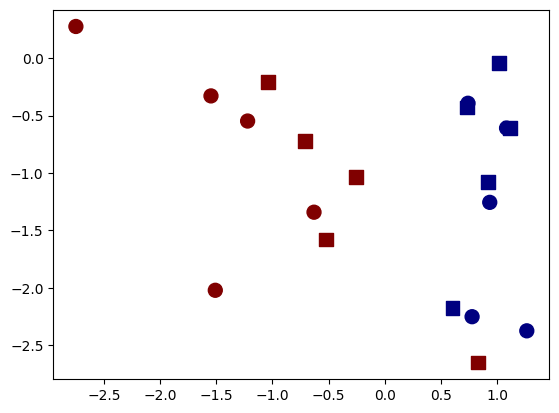

In [50]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1., random_state=23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', marker='s')

### Model

In [51]:
from scipy.stats import mode

In [52]:
class KNNClassification:
    
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
            
    def predict(self, x):
        y_hats = []
        for xi in x:
            distances = np.linalg.norm(self.X - xi, axis=1)
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = list(map(lambda i: self.y[i], indices)) #[self.y[i] for i in indices]
            y_hat = mode(k_nearest_labels, keepdims=False).mode
            y_hats.append(y_hat)
        return np.array(y_hats)

### Evaluation

In [53]:
model = KNNClassification(3)
model.fit(x_train, y_train)

y_hat = model.predict(x_test)
y_test == y_hat

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

### Visualization

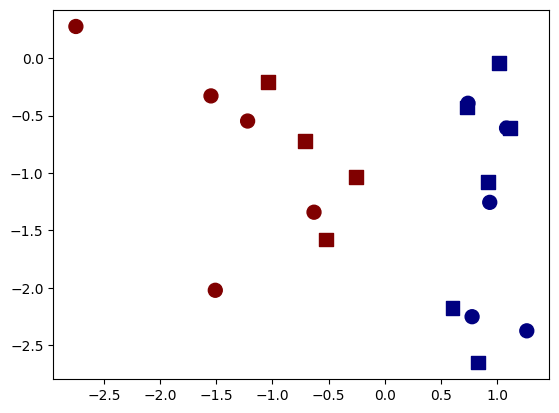

In [54]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_hat, s=100, cmap='jet', marker='s')

## **🔸 Discussion (Time & Memory)**

===============================================================

In [55]:
n_sample=20

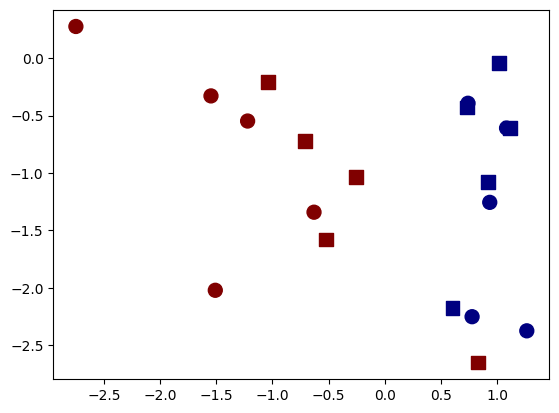

In [56]:
X, y = make_classification(n_samples=n_sample, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1., random_state=23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', marker='s')

In [57]:
# x_train.size, x_train.itemsize, x_train.dtype
x_train.size * x_train.itemsize,"Byte"

(160, 'Byte')

In [58]:
model = KNNClassification(3)
model.fit(x_train, y_train)

In [59]:
%timeit -n 5 model.predict(x_test[[0], :])

381 μs ± 30.4 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)


===============================================================

In [60]:
n_sample=200

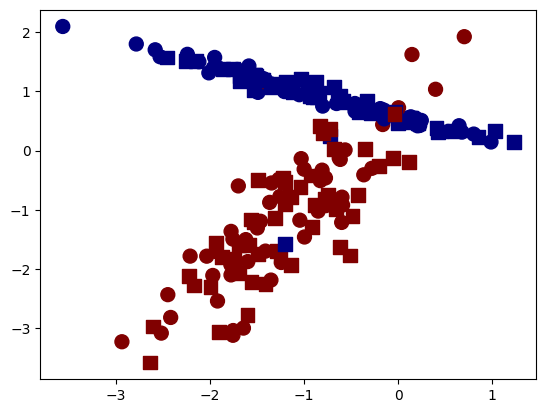

In [61]:
X, y = make_classification(n_samples=n_sample, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1., random_state=23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', marker='s')

In [62]:
# x_train.size, x_train.itemsize, x_train.dtype
x_train.size * x_train.itemsize,"Byte"

(1600, 'Byte')

In [63]:
model = KNNClassification(3)
model.fit(x_train, y_train)

In [64]:
%timeit -n 5 model.predict(x_test[[0], :])

360 μs ± 63 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)


===============================================================

In [65]:
n_sample=2000

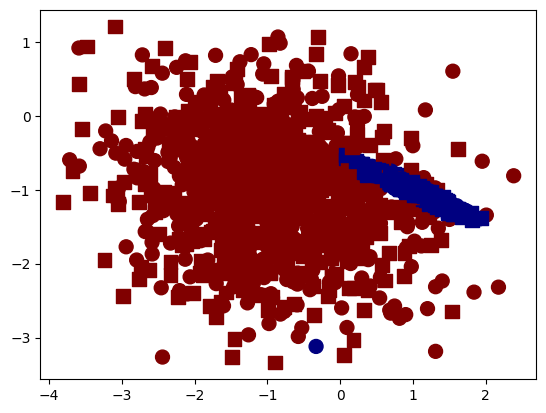

In [66]:
X, y = make_classification(n_samples=n_sample, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1., random_state=23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', marker='s')

In [67]:
# x_train.size, x_train.itemsize, x_train.dtype
x_train.size * x_train.itemsize,"Byte"

(16000, 'Byte')

In [68]:
model = KNNClassification(3)
model.fit(x_train, y_train)

In [69]:
%timeit -n 5 model.predict(x_test[[0], :])

402 μs ± 54.3 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)


===============================================================

In [70]:
n_sample=200000

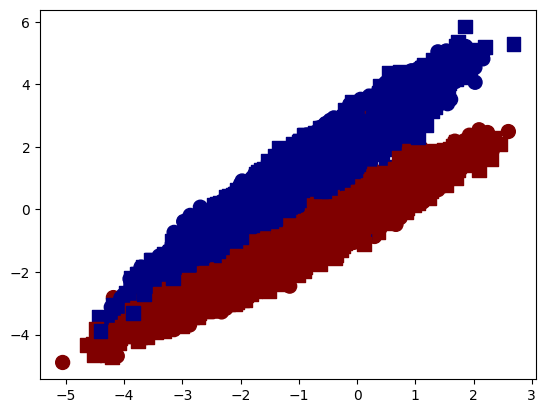

In [71]:
X, y = make_classification(n_samples=n_sample, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1., random_state=23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', marker='s')

In [ ]:
# x_train.size, x_train.itemsize, x_train.dtype
x_train.size * x_train.itemsize,"Byte" 

(1600000, 'Byte')

In [73]:
model = KNNClassification(3)
model.fit(x_train, y_train)

In [74]:
%timeit -n 5 model.predict(x_test[[0], :])

9.14 ms ± 333 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)
